# Multi-class Classifier
In this lab, you will look at how to build a model to distinguish between more than two classes. The code will be similar to the ones you've been using before with a few key changes in the model and in the training parameters. Let's dive in!

IMPORTANT NOTE: This notebook is designed to run as a Colab. Running the notebook on your local machine might result in some of the code blocks throwing errors.

### Download and Prepare the Dataset

You will be using the [Rock-Paper-Scissors dataset](https://www.tensorflow.org/datasets/catalog/rock_paper_scissors), a gallery of hands images in Rock, Paper, and Scissors poses.

In [1]:
# Download the train set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip
    
# Download the test set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip

--2023-08-03 12:51:05--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.221.48, 142.251.220.144, 142.251.220.176, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.221.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘rps.zip’

rps.zip             100%[===================>] 191.38M  20.7MB/s    in 11s     

2023-08-03 12:51:17 (17.1 MB/s) - ‘rps.zip’ saved [200682221/200682221]

--2023-08-03 12:51:17--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.221.48, 142.251.220.144, 142.251.220.176, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.221.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘rps-tes

In [3]:
import zipfile

# Extract the archive
local_zip = './rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./data/rps-train')
zip_ref.close()

local_zip = './rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./data/rps-test')
zip_ref.close()

As usual, you will assign the directory names into variables and look at the filenames as a sanity check.

In [4]:
import os

base_dir = './data/rps-train/rps/'

rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock04-065.png', 'rock01-041.png', 'rock07-k03-055.png', 'rock06ck02-027.png', 'rock03-065.png', 'rock05ck01-047.png', 'rock06ck02-084.png', 'rock06ck02-000.png', 'rock06ck02-034.png', 'rock01-039.png']
['paper05-114.png', 'paper03-095.png', 'paper03-053.png', 'paper06-026.png', 'paper07-073.png', 'paper06-081.png', 'paper03-076.png', 'paper02-076.png', 'paper01-074.png', 'paper02-052.png']
['testscissors01-029.png', 'scissors03-019.png', 'testscissors03-072.png', 'scissors03-089.png', 'scissors01-059.png', 'testscissors01-077.png', 'scissors01-102.png', 'scissors04-034.png', 'testscissors03-088.png', 'testscissors02-044.png']


You can also inspect some of the images to see the variety in your model inputs.

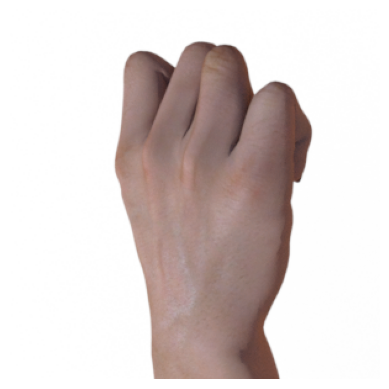

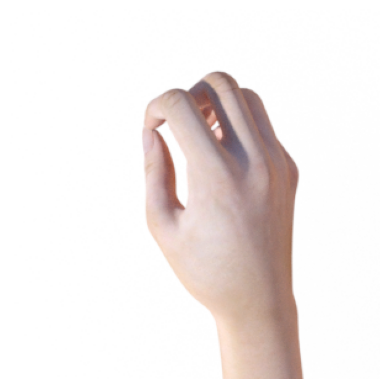

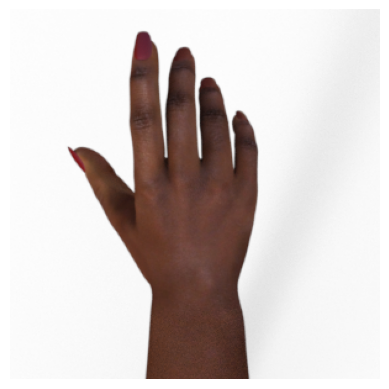

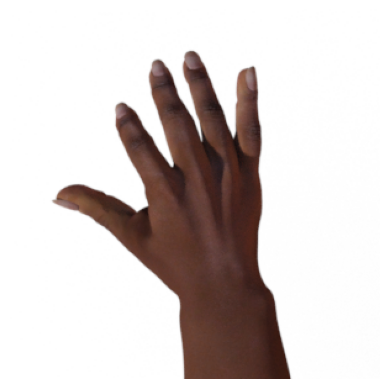

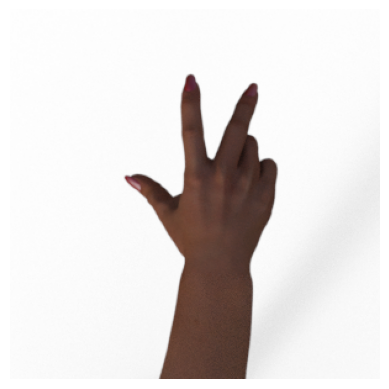

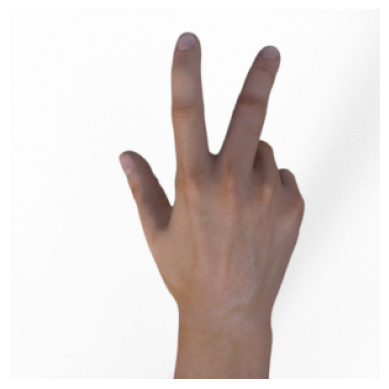

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

### Build the model
You will then build your CNN. You will use 4 convolution layers with 64-64-128-128 filters then append a Dropout layer to avoid overfitting and some Dense layers for the classification. The output layer would be a 3-neuron dense layer activated by Softmax. You've seen this in Course 1 when you were training with Fashion MNIST. It scales your output to a set of probabilities that add up to 1. The order of this 3-neuron output would be paper-rock-scissors (e.g. a [0.8 0.2 0.0] output means the model is prediciting 80% probability for paper and 20% probability for rock.

You can examine the architecture with model.summary() below.

In [6]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Print the model summary
model.summary()

2023-08-03 12:56:38.249032: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-03 12:56:38.275550: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-03 12:56:38.276134: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-03 12:56:38.658199: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

2023-08-03 12:56:39.244473: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-03 12:56:39.244674: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [9]:
# Set the training parameters
model.compile(loss = 'categorical_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy'])

### Prepare the ImageDataGenerator
You will prepare the generators as before. You will set the training set up for data augmentation so it can mimick other poses that the model needs to learn.

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR = "./data/rps-train/rps/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "./data/rps-test/rps-test-set"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


### Train the model and evaluate the results
You will train for 25 epochs and evaludate the results afterwards. Observe how both the training and validation accuracy are trending upwards. This is a good indication that the model is not overfitting to only your training set.

In [10]:
# Train the model
history = model.fit(train_generator, 
                    epochs=25, 
                    steps_per_epoch=20, 
                    validation_data = validation_generator, 
                    verbose = 1, 
                    validation_steps=3)

Epoch 1/25
20/20 [==============================] - 25s 1s/step - loss: 1.1074 - accuracy: 0.3591 - val_loss: 1.0294 - val_accuracy: 0.3333
Epoch 2/25
20/20 [==============================] - 24s 1s/step - loss: 1.0984 - accuracy: 0.4274 - val_loss: 0.9820 - val_accuracy: 0.3763
Epoch 3/25
20/20 [==============================] - 24s 1s/step - loss: 1.0298 - accuracy: 0.4726 - val_loss: 1.0010 - val_accuracy: 0.6290
Epoch 4/25
20/20 [==============================] - 23s 1s/step - loss: 0.9173 - accuracy: 0.5516 - val_loss: 0.5534 - val_accuracy: 0.7016
Epoch 5/25
20/20 [==============================] - 23s 1s/step - loss: 0.8000 - accuracy: 0.6218 - val_loss: 0.3411 - val_accuracy: 0.9355
Epoch 6/25
20/20 [==============================] - 23s 1s/step - loss: 0.7415 - accuracy: 0.6476 - val_loss: 0.9099 - val_accuracy: 0.5511
Epoch 7/25
20/20 [==============================] - 24s 1s/step - loss: 0.5985 - accuracy: 0.7437 - val_loss: 0.2970 - val_accuracy: 0.8333
Epoch 8/25
20/20 [==

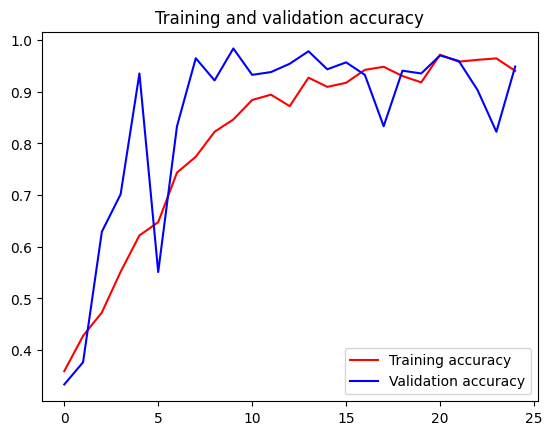

<Figure size 640x480 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

### Model Prediction
You should be able to upload an image here and have it classified without crashing. This code block will only work in Google Colab, however. You can use your own images or use the ones available here

Note: Old versions of the Safari browser might have compatibility issues with the code block below. If you get an error after you select the images(s) to upload, you can consider updating your browser to the latest version. If not possible, please comment out or skip the code block below, uncomment the next code block and run it.

In [ ]:
# ## NOTE: If you are using Safari and this cell throws an error,
# ## please skip this block and run the next one instead.

# import numpy as np
# from google.colab import files
# from tensorflow.keras.utils import load_img, img_to_array

# uploaded = files.upload()

# for fn in uploaded.keys():
 
#   # predicting images
#   path = fn
#   img = load_img(path, target_size=(150, 150))
#   x = img_to_array(img)
#   x = np.expand_dims(x, axis=0)

#   images = np.vstack([x])
#   classes = model.predict(images, batch_size=10)
#   print(fn)
#   print(classes)

If you're using Safari and the cell above throws an error, you will need to upload the images(s) manually in their workspace.

Instructions on how to upload image(s) manually in a Colab:

1. Select the folder icon on the left menu bar.\
2. Click on the folder with an arrow pointing upwards named ..\
3. Click on the folder named tmp.\
4. Inside of the tmp folder, create a new folder called images. You'll see the New folder option by clicking the 3 vertical dots menu button next to the tmp folder.\
5. Inside of the new images folder, upload an image(s) of your choice. Drag and drop the images(s) on top of the images folder.\
6. Uncomment and run the code block below.

In [ ]:
# # CODE BLOCK FOR OLDER VERSIONS OF SAFARI

# import os
# import numpy as np
# from tensorflow.keras.utils import load_img, img_to_array

# images = os.listdir("/tmp/images")

# print(images)

# for i in images:
#     print()
#     # predicting images
#     path = '/tmp/images/' + i
#     img = load_img(path, target_size=(150, 150))
#     x = img_to_array(img)
#     x = np.expand_dims(x, axis=0)
    
#     images = np.vstack([x])
#     classes = model.predict(images, batch_size=10)
#     print(path)
#     print(classes)

# Wrap Up
That concludes this short exercise on the multi-class classifiers. You saw that with just a few changes, you were able to convert your binary classifiers to predict more classes. You used the same techniques for data and model preparation and were able to get relatively good results in just 25 epochs. For practice, you can search for other datasets (e.g. here) with more classes and revise the model to accomodate it. Try to experiment with different layers and data augmentation techniques to improve your metrics.